In [87]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import MinMaxScaler, binarize
import statsmodels.formula.api as sm
import scipy.stats as ss



import math
import random
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

<H1> Part 1 : DATA PREPARATION_ NYC data -> target Sale Price</H1>

In [88]:
#Real Estate
df = pd.read_csv("NYC_Real_Estate.csv")
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


In [89]:
#let's change the tax and building class to categorical objects. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         48248 non-null  int64 
 1   BLOCK                           48248 non-null  int64 
 2   LOT                             48248 non-null  int64 
 3   ZIP CODE                        48248 non-null  int64 
 4   RESIDENTIAL UNITS               48248 non-null  int64 
 5   TOTAL UNITS                     48248 non-null  int64 
 6   GROSS SQUARE FEET               48248 non-null  int64 
 7   YEAR BUILT                      48248 non-null  int64 
 8   TAX CLASS AT TIME OF SALE       48248 non-null  object
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object
 10  SALE PRICE                      48248 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.0+ MB


In [90]:
df['TAX CLASS AT TIME OF SALE'].unique()

array(['Low', 'High'], dtype=object)

In [91]:
tax=pd.Series(df['TAX CLASS AT TIME OF SALE'])


In [92]:
#Replace tax class 'Low' = 0, tax class 'High'=1
tax_=tax.replace("Low",0).replace("High",1)

tax_

0        0
1        0
2        0
3        0
4        0
        ..
48243    0
48244    0
48245    0
48246    1
48247    1
Name: TAX CLASS AT TIME OF SALE, Length: 48248, dtype: int64

In [93]:
#Object data type to Categorical 
df['TAX CLASS AT TIME OF SALE']=tax_

In [94]:
df['BUILDING CLASS AT TIME OF SALE'].unique()

array(['C2', 'C4', 'D9', 'D1', 'C6', 'RR', 'S3', 'S4', 'S5', 'K4', 'A9',
       'A4', 'S2', 'C0', 'C3', 'C5', 'C1', 'C7', 'D6', 'D7', 'S9', 'O2',
       'O1', 'O3', 'O5', 'K1', 'K2', 'L8', 'L1', 'H1', 'H8', 'H3', 'M1',
       'N2', 'L9', 'GW', 'G2', 'M4', 'Z9', 'B9', 'D3', 'O6', 'O4', 'L3',
       'H2', 'E1', 'D5', 'R9', 'B3', 'B1', 'C9', 'S1', 'A5', 'J8', 'B2',
       'F5', 'G5', 'G4', 'M9', 'Y1', 'O8', 'HR', 'G1', 'E7', 'I5', 'I9',
       'I4', 'N9', 'H9', 'D4', 'K9', 'HB', 'V1', 'J4', 'A7', 'D2', 'O7',
       'W3', 'HS', 'H6', 'HH', 'W8', 'A1', 'K5', 'F1', 'G7', 'V9', 'A2',
       'R3', 'V0', 'G0', 'F4', 'G9', 'E9', 'RP', 'RG', 'G6', 'I3', 'W4',
       'R2', 'V3', 'R4', 'I1', 'A6', 'P2', 'Q8', 'A3', 'Z0', 'I7', 'W1',
       'RB', 'U1', 'F2', 'F9', 'GU', 'I6', 'G8', 'P5', 'RS', 'W6', 'RK',
       'Y3', 'S0', 'W9', 'M2', 'G3', 'V6', 'R1', 'R8', 'K7', 'K3', 'R6',
       'H4', 'R5', 'RT', 'RW', 'P9', 'R7', 'W2', 'D8', 'P8', 'K6', 'V2',
       'M3', 'D0', 'E2', 'Z2', 'RA', 'RH', 'R0', 'T

In [95]:
df['ZIP CODE'].unique()

array([10009, 10011, 10001, 10013, 10002, 10007, 10036, 10019, 10003,
       10018, 10005, 10004, 10038, 10006, 10010, 10016, 10012, 10014,
       10030, 10031, 10027, 10037, 10035, 10026, 10039, 10029, 10032,
       10463, 10034, 10025, 10017, 10022, 10167, 10105, 10044, 10065,
       10021, 10075, 10028, 10128, 10023, 10024, 10033, 10040, 10457,
       10458, 10451,     0, 10456, 10469, 10466, 10475, 10468, 10467,
       10460, 10473, 10472, 10464, 10462, 10803, 10465, 10459, 10471,
       10453, 10452, 10454, 10474, 10455, 10461, 10470, 11228, 11214,
       11220, 11209, 11219, 11221, 11233, 11213, 11206, 11216, 11205,
       11238, 11226, 11204, 11234, 11217, 11201, 11218, 11232, 11230,
       11235, 11212, 11237, 11207, 11236, 11239, 11231, 11249, 11224,
       11225, 11208, 11210, 11203, 11229, 11215, 11223, 11222, 11211,
       11370, 11691, 11692, 11106, 11103, 11377, 11105, 11102, 11101,
       11361, 11360, 11357, 11358, 11364, 11694, 11426, 11428, 11004,
       11001, 11435,

What to drop => Looking at the number of building codeS and Zip Codes I decide I will drop these columns instead of OneHot EnCoding this and making a mess. For the sake of linear modelling I will also drop columns: block AND lot. Zip could be added back to drill down further than Borough in terms of location for price predictions.

In [96]:
df=df.drop(columns=['BUILDING CLASS AT TIME OF SALE', 'BLOCK',"LOT", "ZIP CODE"])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   BOROUGH                    48248 non-null  int64
 1   RESIDENTIAL UNITS          48248 non-null  int64
 2   TOTAL UNITS                48248 non-null  int64
 3   GROSS SQUARE FEET          48248 non-null  int64
 4   YEAR BUILT                 48248 non-null  int64
 5   TAX CLASS AT TIME OF SALE  48248 non-null  int64
 6   SALE PRICE                 48248 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


Dealing with NANs and Zeros, and too much data to process....

In [98]:
#Are there nulls? It looks like there are no nulls in our set! 
df.isnull().sum().sort_values()

BOROUGH                      0
RESIDENTIAL UNITS            0
TOTAL UNITS                  0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
dtype: int64

In [99]:
#but there are zeros in many columns. 
df.describe()

,BOROUGH,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,48248.000000,48248.000000,48248.000000,4.824800e+04,48248.000000,48248.000000,4.824800e+04
mean,3.251554,2.569682,2.837755,3.672552e+03,1827.738082,0.074262,1.155576e+06
std,0.903331,17.468624,20.752771,2.947540e+04,464.418481,0.262200,1.340423e+07
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3.000000,1.000000,1.000000,8.280000e+02,1920.000000,0.000000,8.056000e+04
50%,3.000000,1.000000,1.000000,1.620000e+03,1931.000000,0.000000,4.800000e+05
75%,4.000000,2.000000,2.000000,2.520000e+03,1961.000000,0.000000,8.300000e+05
max,5.000000,1844.000000,2261.000000,3.750565e+06,2017.000000,1.000000,2.210000e+09


In [100]:
#what % are zeros? Over 21%! Having such a large data set (~50k) losing 20%/10k will make no difference in analysis. I decide to drop rows with zero values for sale price, REALY TO HELP reduce the size of the data set. 
perczero=df[df['SALE PRICE']==0]
perczero.count()/len(df)

BOROUGH                      0.211988
RESIDENTIAL UNITS            0.211988
TOTAL UNITS                  0.211988
GROSS SQUARE FEET            0.211988
YEAR BUILT                   0.211988
TAX CLASS AT TIME OF SALE    0.211988
SALE PRICE                   0.211988
dtype: float64

In [101]:
df=df[df['SALE PRICE']!=0]
df=df[df['RESIDENTIAL UNITS']!=0]
df=df[df['TOTAL UNITS']!=0]
df=df[df['GROSS SQUARE FEET']!=0]
df=df[df['YEAR BUILT']!=0]
df.describe()
#now I've managed to reduce the data set 50% and only have rows with complete data. 

,BOROUGH,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,28039.000000,28039.000000,28039.000000,2.803900e+04,28039.000000,28039.000000,2.803900e+04
mean,3.563144,3.197511,3.279218,3.404587e+03,1940.392525,0.006883,1.137247e+06
std,1.000855,20.481993,20.695112,2.748838e+04,30.480616,0.082681,5.480186e+06
min,1.000000,1.000000,1.000000,1.500000e+02,1800.000000,0.000000,1.000000e+00
25%,3.000000,1.000000,1.000000,1.352000e+03,1920.000000,0.000000,4.180000e+05
50%,4.000000,2.000000,2.000000,1.836000e+03,1930.000000,0.000000,6.030500e+05
75%,4.000000,2.000000,2.000000,2.558500e+03,1957.000000,0.000000,9.150000e+05
max,5.000000,1844.000000,1866.000000,3.750565e+06,2017.000000,1.000000,6.200000e+08


In [102]:
#Option if it's still too much data to run a pairsplot....
df=df.sample((len(df)-round(len(df)*.5)), replace=False)

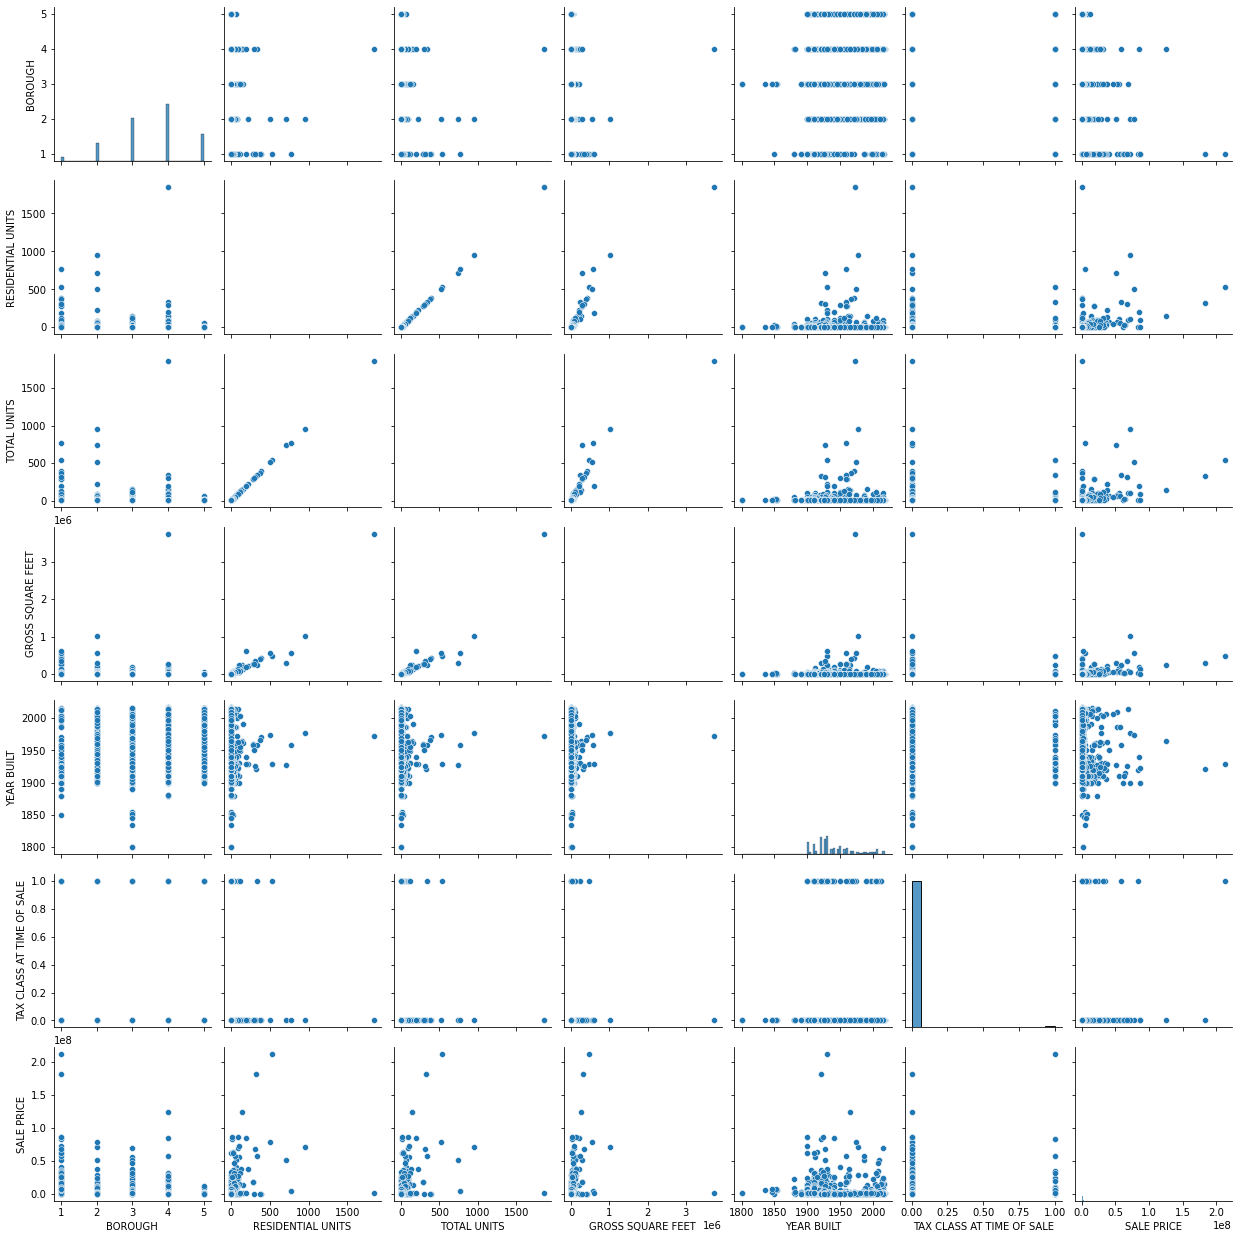

In [103]:
sns.pairplot(df)

In [104]:
#RESIDENTIAL and TOTAL UNITS are the same. I drop RESIDENTIAL UNITS from the DF. 
df=df.drop(columns=['RESIDENTIAL UNITS'])

We find some obvious correlations: 
Sale price correlates positively with Gross Square Feet and Total Units. 
Visually a linear relationship between Gross Square Feet and Total Units. 

But...I need to deal with big outliers first.....

In [105]:
df=df[df["SALE PRICE"] < 3000000]
df=df[df["GROSS SQUARE FEET"] < 500000]
df=df[df["TOTAL UNITS"] < 200]

<AxesSubplot:xlabel='BOROUGH', ylabel='SALE PRICE'>

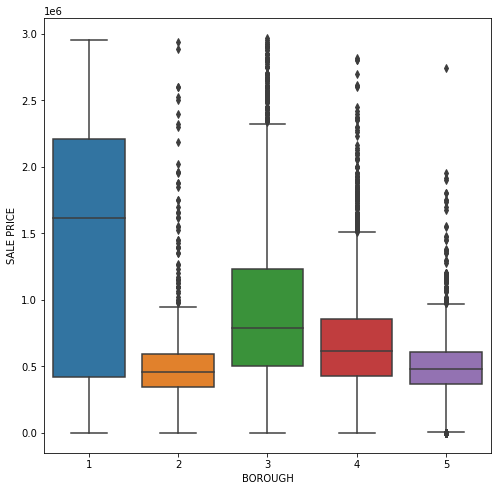

In [106]:
sns.boxplot(x="BOROUGH", y="SALE PRICE", data=df)

This is definitely worth looking into further. Another way to look at the data is to cut it along Borough lines, as they are all different, especially Borough 1. Each Borough could be analyzed down to the zip codes or Block/Lot level. Looking at them all at once, there are just too many to make sense of it. 

In [107]:
df.describe()

,BOROUGH,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,13401.000000,13401.000000,13401.000000,13401.000000,13401.000000,1.340100e+04
mean,3.630401,1.987165,2178.978733,1941.537199,0.005746,6.927721e+05
std,0.950113,3.336655,3464.203517,30.430498,0.075586,4.667285e+05
min,1.000000,1.000000,150.000000,1800.000000,0.000000,1.000000e+00
25%,3.000000,1.000000,1344.000000,1920.000000,0.000000,4.080000e+05
50%,4.000000,2.000000,1800.000000,1930.000000,0.000000,5.850000e+05
75%,4.000000,2.000000,2420.000000,1960.000000,0.000000,8.600000e+05
max,5.000000,152.000000,231733.000000,2017.000000,1.000000,2.970000e+06


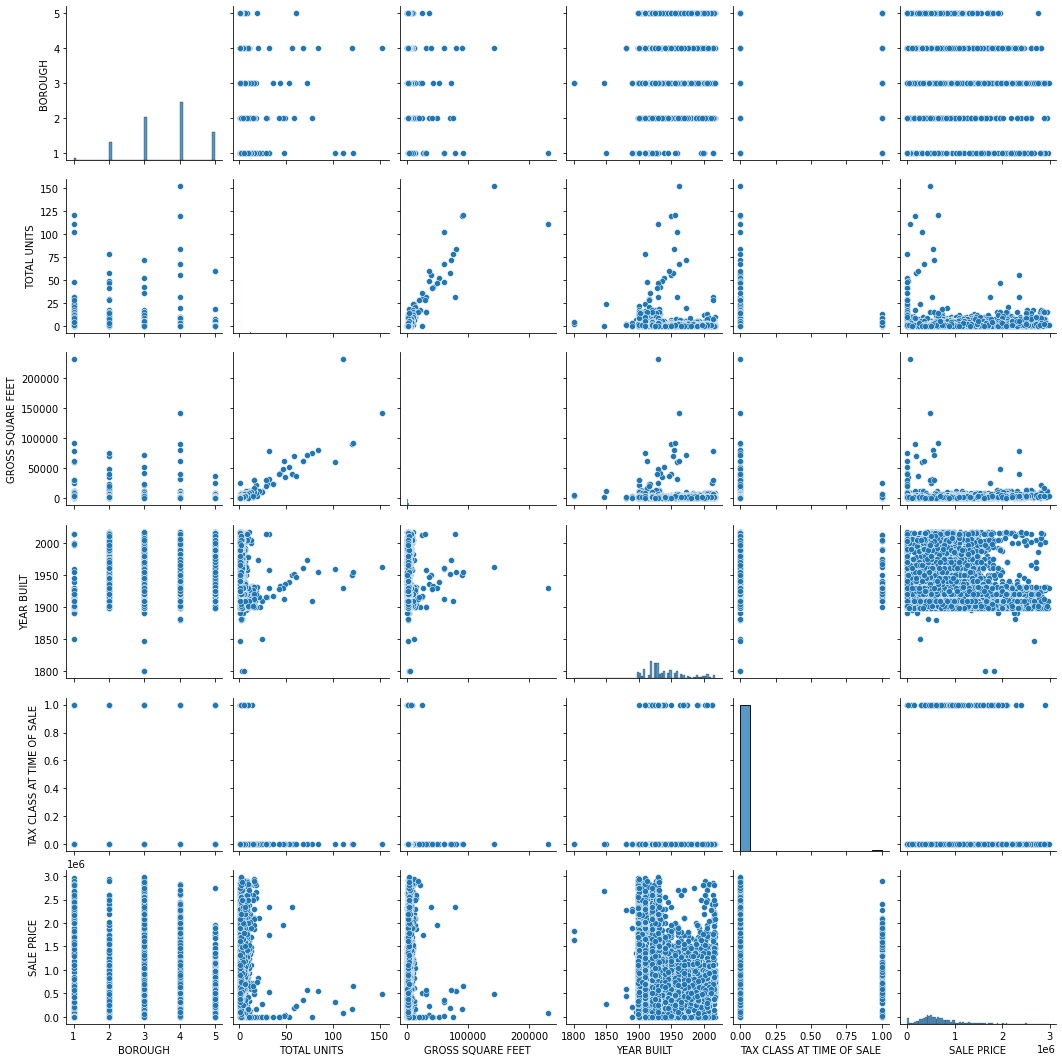

In [108]:
sns.pairplot(df)

<AxesSubplot:>

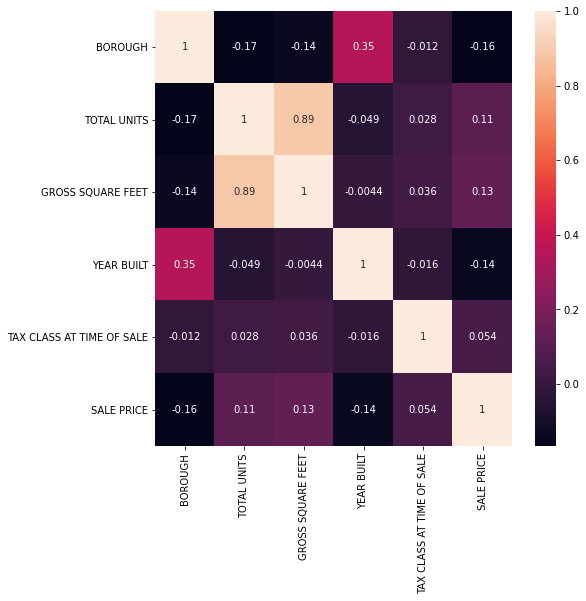

In [109]:
sns.heatmap(df.corr(), annot=True)

<H1> Part 1 : DATA PREPARATION_ credit risk data -> target Loan_Status </H1>

In [110]:
df1 = pd.read_csv("credit_risk_dataset.csv")
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


For the Loan Data set, I will change from object to categorical: home ownership, loan_grade, loan_intent, cb_person_default_on_file
I have no clue what might be important so I don't drop anything yet.


In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [112]:
df1['loan_grade']=df1['loan_grade'].astype('category')
df1['loan_intent']=df1['loan_intent'].astype('category')
df1['person_home_ownership']=df1['person_home_ownership'].astype('category')
df1['cb_person_default_on_file']=df1['cb_person_default_on_file'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  category
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  category
 5   loan_grade                  32581 non-null  category
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               29465 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  category
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


DEALING WITH NANS:

In [113]:
df1.isnull().sum().sort_values()

person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
person_emp_length              895
loan_int_rate                 3116
dtype: int64

In [114]:
#with 32000+ records, I decide to drop any nulls. I really want to keep the loan_int_rate column....
df1=df1.dropna()

In [115]:
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [116]:
#CHECK HOW MANY UNIQUE ANSWERS EXISTS HERE - DECIDE TO KEEP IT
df1['loan_intent'].unique()

['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']
Categories (6, object): ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']

Loan percent income- we don't need this calculated column when we already have their income and loan amount. 
Plus I'm dropping Collinear cb_person_cred_hist_length . 
Lastly, loan_intent: we care abour money- right?

In [117]:
df1=df1.drop(columns=['loan_percent_income', 'loan_intent', 'cb_person_cred_hist_length'])

Outliers in loans data set...
-Age over 100? comployement over 50 years? iNCOME OVER 1 MILL? Be sensible and cut those out!

In [118]:
df1=df1[df1["person_age"] <100]
df1=df1[df1["person_emp_length"] <50]
df1=df1[df1["person_income"] <1000000]
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status
count,28626.000000,28626.000000,28626.000000,28626.000000,28626.000000,28626.000000
mean,27.708726,66125.198211,4.779711,9655.417278,11.040068,0.216656
std,6.166480,46951.228812,4.034943,6328.371820,3.229376,0.411974
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000
25%,23.000000,39456.000000,2.000000,5000.000000,7.900000,0.000000
50%,26.000000,55826.000000,4.000000,8000.000000,10.990000,0.000000
75%,30.000000,80000.000000,7.000000,12500.000000,13.480000,0.000000
max,84.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000


In [119]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file
1,21,9600,OWN,5.0,B,1000,11.14,0,N
2,25,9600,MORTGAGE,1.0,C,5500,12.87,1,N
3,23,65500,RENT,4.0,C,35000,15.23,1,N
4,24,54400,RENT,8.0,C,35000,14.27,1,Y
5,21,9900,OWN,2.0,A,2500,7.14,1,N


In [120]:
#Option if it's still too much data to run a pairsplot....
df1=df1.sample((len(df1)-round(len(df1)*.5)), replace=False)

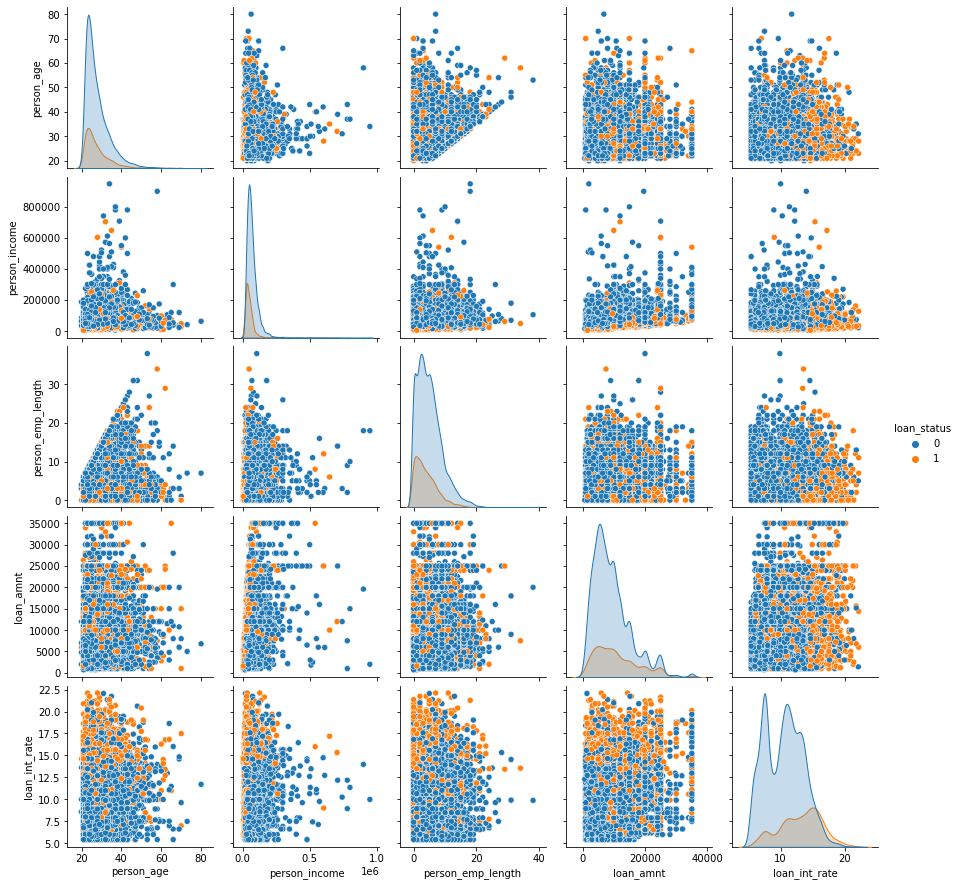

In [121]:
sns.pairplot(df1, hue="loan_status")

Relationships: 
age and credit history length...is this useful? 
Loan_amount and personal income, uh yep kinda obvious though.


<AxesSubplot:>

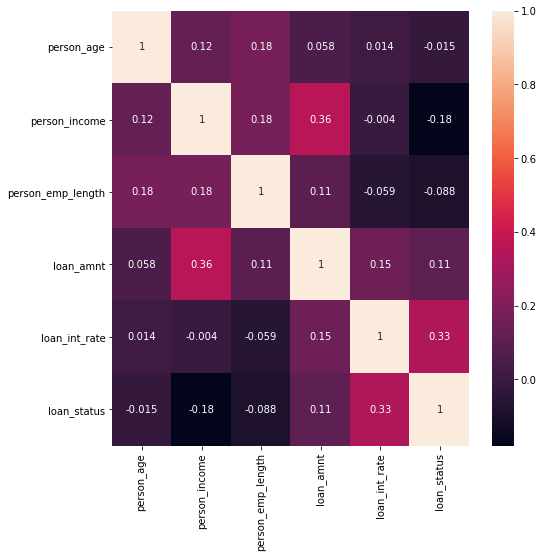

In [122]:
sns.heatmap(df1.corr(), annot=True)

C:\Users\Mom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age', ylabel='count'>

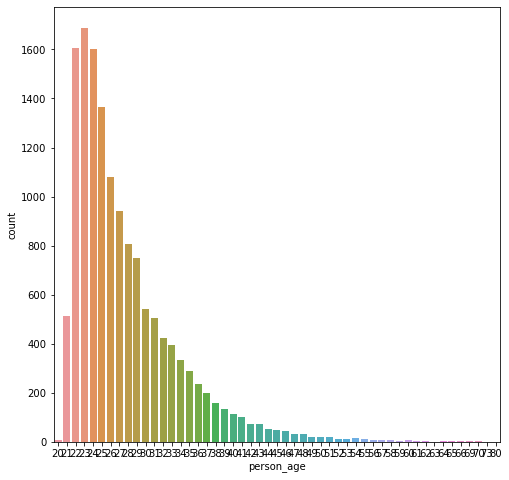

In [123]:
sns.countplot(df1["person_age"])

<AxesSubplot:xlabel='person_age', ylabel='loan_int_rate'>

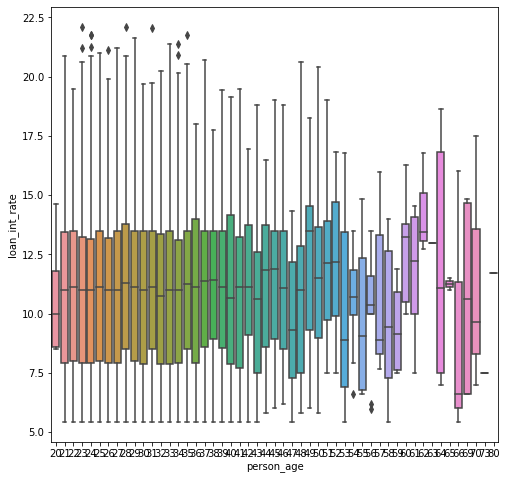

In [124]:
#not as much agesim as what I would have suspected....
sns.boxplot(x="person_age", y="loan_int_rate", data=df1)

<AxesSubplot:xlabel='person_home_ownership', ylabel='loan_int_rate'>

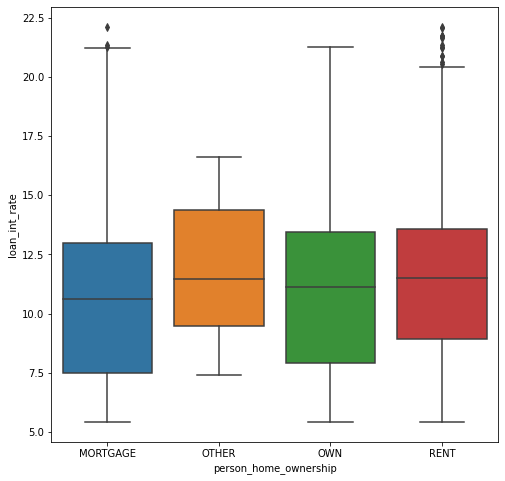

In [125]:
sns.boxplot(x='person_home_ownership', y="loan_int_rate", data=df1)

<AxesSubplot:xlabel='loan_grade', ylabel='loan_int_rate'>

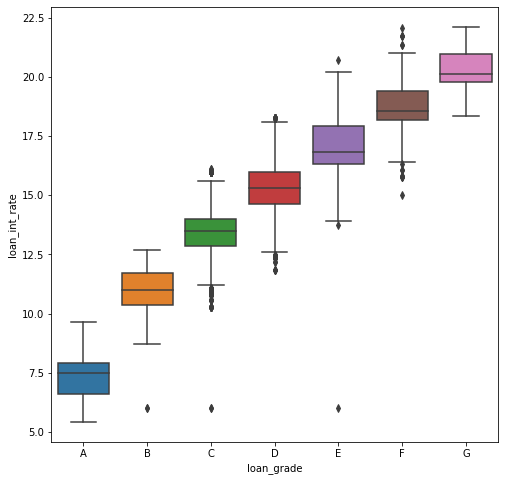

In [126]:
# there is a clear linear relationship here that the model should pick up.

sns.boxplot(x='loan_grade', y="loan_int_rate", data=df1)

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='loan_int_rate'>

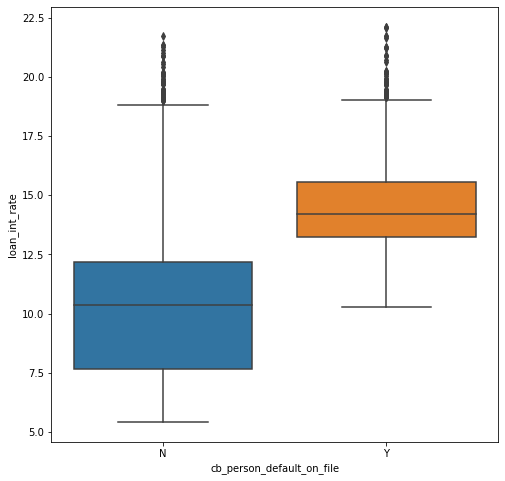

In [127]:
# there is a connection between cb_person_default_on_file and loan_int_rate. Those needing a cosigner on file seem to be in a different group.

sns.boxplot(x='cb_person_default_on_file', y="loan_int_rate", data=df1)

In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14313 entries, 1676 to 361
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   person_age                 14313 non-null  int64   
 1   person_income              14313 non-null  int64   
 2   person_home_ownership      14313 non-null  category
 3   person_emp_length          14313 non-null  float64 
 4   loan_grade                 14313 non-null  category
 5   loan_amnt                  14313 non-null  int64   
 6   loan_int_rate              14313 non-null  float64 
 7   loan_status                14313 non-null  int64   
 8   cb_person_default_on_file  14313 non-null  category
dtypes: category(3), float64(2), int64(4)
memory usage: 1.3 MB


<H1> Part 2 Linear Regression</H1>

In [129]:
 #One hot encoding for 'Borough" and "Tax Class at time of sale"
 df_ = pd.get_dummies(df, drop_first=True)

In [130]:
y = np.array(df_["SALE PRICE"]).reshape(-1,1)
y.shape

(13401, 1)

In [131]:
#Get a new df with only the features we'll use
df_ = df.drop(columns={"SALE PRICE"})
#Make that df_ into an array. 
x = np.array(df_)
x.shape

(13401, 5)

In [132]:
#3 Split Data. 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [133]:
#5. normalize training data - it isn't really a normal distribution along some dimensions
scaler = MinMaxScaler()
x2 = scaler.fit_transform(X_train)
X_trans = scaler.transform(X_test)

In [134]:
#6 Generate SALE PRICE model 
model = LinearRegression().fit(x2,y_train)

In [135]:
#Predictions
preds = model.predict(X_trans)

In [136]:
#R2 and RMSE- THIS HAS GOT TO BE THE WORST MODEL EVER MADE.....
r_sq = model.score(X_trans, y_test)
rmse=mean_squared_error(preds,y_test,squared=False)
print('R-squared:', r_sq)
print('RMSE:', rmse)

R-squared: 0.04439281835402897
RMSE: 464824.6046665495


<H1> PART 4 ASSESSING Rgression Model </H1> 

my terrible model is:

'SALE PRICE'= (-47600)'BOROUGH' + (6473)'TOTALUNITS' + (2.98)'FT2'+ (-1566)'YEARBUILT' + (183000)'TAXCLASS' +  3883000
 
-r2 value of 3.1%  meaning sale price variability is 97% unknown. 
-Below I look at residuals, VIF and do a statsmodel run to look at P values 

In [137]:
#Residuals - 
tmp1 = pd.DataFrame(y_test, columns={"Y values"})
tmp2 = pd.DataFrame(preds, columns={"Predictions"})
tmp3 = pd.DataFrame((y_test-preds), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.head()

,Y values,Predictions,Residual
0,755000,705010.371367,49989.628633
1,43000,947820.072023,-904820.072023
2,1080000,703979.070471,376020.929529
3,508000,687045.707975,-179045.707975
4,1150000,789539.759879,360460.240121


<AxesSubplot:>

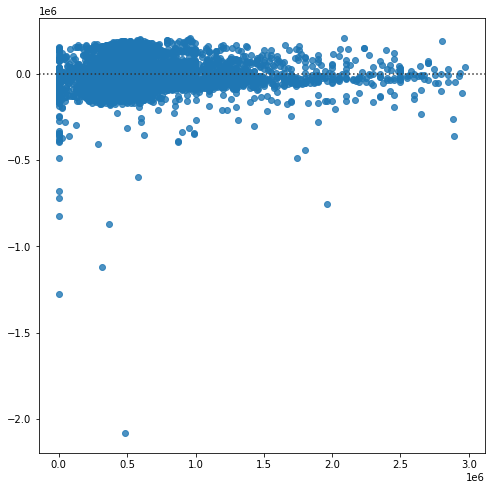

In [138]:
sns.residplot(x=y_test, y=(y_test-preds), data=df_)

#Residuals - EWWW, even though there isn't a pattern (good thing) I have allowed too many outliers into the model. Generally the predictions are too high (negative residuals) 

Looking at the VIF factors below...
Maybe I should break out Burough 1 from the dataset? Maybe we are dealing with more than one group of properties?
If it was still bad, I could take out year altogether- is this a confounding variable for my model?

In [139]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function will check the VIF of each variable in a DF and return the results in another DF
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [140]:
#Check VIFs
calc_vif(df_)

,variables,VIF
0,BOROUGH,16.705642
1,TOTAL UNITS,6.631235
2,GROSS SQUARE FEET,6.785636
3,YEAR BUILT,17.869095
4,TAX CLASS AT TIME OF SALE,1.007203


In [141]:
import statsmodels.api as sm

In [142]:
#Fit the model. 
X2 = sm.add_constant(df_)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          5.60e-141
Time:                        13:29:33   Log-Likelihood:            -1.9361e+05
No. Observations:               13401   AIC:                         3.872e+05
Df Residuals:                   13395   BIC:                         3.873e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Gross Square feet is yet another thing I could look at, after breaking out Burough 1 and looking at year. I'm not usre if you want that done for this assgt so I move on to Logistic Regression.....

<H1> Part 3 Logistic Regression=> can we predict who will default</H1>
<h3> Modelling target => "loan_status" where 1=default, 0 = non-default 

In [143]:
#one hot encoding & check it
df1_=pd.get_dummies(df1, drop_first=True)

In [144]:
df1_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14313 entries, 1676 to 361
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   14313 non-null  int64  
 1   person_income                14313 non-null  int64  
 2   person_emp_length            14313 non-null  float64
 3   loan_amnt                    14313 non-null  int64  
 4   loan_int_rate                14313 non-null  float64
 5   loan_status                  14313 non-null  int64  
 6   person_home_ownership_OTHER  14313 non-null  uint8  
 7   person_home_ownership_OWN    14313 non-null  uint8  
 8   person_home_ownership_RENT   14313 non-null  uint8  
 9   loan_grade_B                 14313 non-null  uint8  
 10  loan_grade_C                 14313 non-null  uint8  
 11  loan_grade_D                 14313 non-null  uint8  
 12  loan_grade_E                 14313 non-null  uint8  
 13  loan_grade_F   

In [145]:
df1Y = df1_["loan_status"]
df1X = df1_.drop(columns={"loan_status"}) 

X1 = np.array(df1X)
y1 = np.array(df1Y).reshape(-1,1)
X1.shape, y1.shape

((14313, 15), (14313, 1))

In [146]:
#Split Data. 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33)

In [147]:
y1_test.shape

(4724, 1)

In [148]:
#Scale Data. 
scalerL = MinMaxScaler()
XLog_Train = scalerL.fit_transform(X1_train)
XLog_test = scalerL.transform(X1_test)

In [149]:
#Train model
logmodel = LogisticRegression().fit(XLog_Train,y1_train.ravel())

In [150]:
#Make predictions
logpreds = logmodel.predict(XLog_test)


In [151]:
#Generate 1/0 results and show results
default1 = binarize(np.array(logpreds).reshape(-1,1), threshold=.5)

See graphing and accuracy stats below.....Section 4

Statsmodels.....

In [152]:
#one hot encoding & check it
df3_=pd.get_dummies(df1, drop_first=True)
df3Y = df3_["loan_status"]
df3X = df3_.drop(columns={"loan_status"}) 

X3 = np.array(df3X)
y3 = np.array(df3Y).reshape(-1,1)
X3.shape, y3.shape

((14313, 15), (14313, 1))

In [153]:
test3, train3 = train_test_split(df3_,test_size=0.3)

In [154]:
train3.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
4222,23,38004,2.0,4500,7.88,0,0,0,1,0,0,0,0,0,0,0
17740,25,78000,7.0,9000,11.78,1,0,0,0,0,1,0,0,0,0,1
4118,22,22000,6.0,4350,11.54,0,0,0,1,0,1,0,0,0,0,0
23137,34,57996,3.0,8000,11.12,0,0,0,1,1,0,0,0,0,0,0
26739,34,110000,15.0,6000,9.45,0,0,0,0,1,0,0,0,0,0,0


<h1> Part 4 Assessing the Logistic Regression Model </h1>

In [155]:
#Define formula
form = "loan_status ~ person_age + person_income + person_emp_length +  loan_amnt +  loan_int_rate + person_home_ownership_OTHER + person_home_ownership_OWN + person_home_ownership_RENT + loan_grade_B  + loan_grade_C +loan_grade_D + loan_grade_E + loan_grade_F + loan_grade_G + cb_person_default_on_file_Y"
model3 = sm.logit(data=train3, formula=form).fit()
model3.summary()

AttributeError: module 'statsmodels.api' has no attribute 'logit'

In [ ]:
print('Accuracy of model:')
print("F1:",f1_score(y1_test, default1))
print("Acc:",accuracy_score(y1_test, default1))
print("LogLoss:", log_loss(y1_test, logpreds))

In [ ]:
conf_matrix = confusion_matrix(y1_test,default1)
sns.heatmap(conf_matrix, annot=True)

In [ ]:
print(conf_matrix)

In [ ]:
print(classification_report(y1_test,default1))

This is bad, tonnes (F1score .48) of loans are being given out to people who then default!! We have categorized them as safe bets, and lost a tonne of money. Accuracy may be okay, but when this much $ if on the line, we need to get those Type 2 errors/False+ down!

- things to do: first I would check if we have an unbalanced dataset. Then undersampling the data to address that. I will perform that below.

- I would also go through 1 variable at a time and get rid of high Pvalue variables and confounders (like home_ownership_Other, cb_person_default_on_file_Y, person_Age). I suspect that if age was taken out, employment length may be more meaningful as they are related. I don't think I will do that here as it will be repetitive. Simply drop the offending variable from df1 then run another logistic regression...

First let's check the balance of the data along the variable 'loan_status'

In [ ]:
df1['loan_status'].value_counts().plot(kind='bar')

In [ ]:
#3058 defaults is a large enough group for a good sample space, so I cut down the goodbets randomly to match it-3058. My IBD package isn't working- giving me the opportunity to do it manually in this case.
df1['loan_status'].value_counts()

In [ ]:
df1.head()

In [ ]:
#one hot encoding & check it - going right back to virgin 'df1' because Python is mad at me otherwise.
df4_=pd.get_dummies(df1, drop_first=True)

# do the splits
test4, train4 = train_test_split(df4_,test_size=0.3)

In [ ]:
# Prep TEST data
y_test4=np.array(test4["loan_status"]).reshape(-1,1)
X_test4=np.array(test4.drop(columns={"loan_status"}))

#Manually resample training data.
df4_defaults= train4[train4["loan_status"]==1]
df4_goodbets= train4[train4["loan_status"]==0]

#randomly cut down df4_ goodbets to 3058 randomly chosen rows
df_goodbets=df4_goodbets.sample(random_state=3058)

#906 undersampled rows stuck together- but balanc...
under=pd.concat([df_goodbets, df4_defaults])

#Trainig y
y_under=np.array(under["loan_status"]).reshape(-1,1)

#training x
X_under= np.array(under.drop(columns={"loan_status"}))


In [ ]:
#normalize data

scalerb=MinMaxScaler()
X_undern=scalerb.fit_transform(X_under)
X_testn=scalerb.transform(X_test4)

In [ ]:
#Define formula
form1 = "loan_status ~ person_age + person_income + person_emp_length +  loan_amnt +  loan_int_rate + person_home_ownership_OTHER + person_home_ownership_OWN + person_home_ownership_RENT + loan_grade_B  + loan_grade_C +loan_grade_D + loan_grade_E + loan_grade_F + loan_grade_G + cb_person_default_on_file_Y"
model4 = sm.logit(data=X_undern, formula=form1).fit()
model4.summary()

In [ ]:
underpreds = model4.predict(X_test4)

In [ ]:
#Generate 1/0 results and show results
defaultsunder = binarize(np.array(underpreds).reshape(-1,1), threshold=.5)

In [ ]:
#11 Classification report
print(classification_report(y_test4, underpreds, digits=2))

In [ ]:
conf_matrix = confusion_matrix(y_test4, underpreds)
sns.heatmap(conf_matrix, annot=True)

print(accuracy_score(y_test4, underpreds)*100)
print("F1:", f1_score(y_test4, defaultsunder))



In [ ]:
#from imblearn.over_sampling import RandomOverSampler

#over=RandomOverSampler(sampling_strategy=1)
#X_smote, y_smote = over.fit_resample(X4_train, y4_train)